In [1]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

C:\Users\virgi\miniconda3\envs\reob_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load a pretrained model yolov8x, yolov8x-seg(with segmentation), yolov8x-cls(with classification) 
model = YOLO("yolov8n-seg.pt")  

In [3]:
img = cv2.imread('bus.jpg') #"https://ultralytics.com/images/bus.jpg"
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

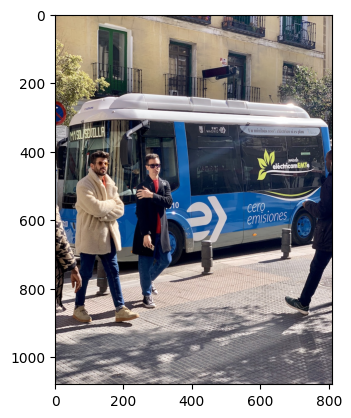

In [4]:
plt.imshow(img)

In [5]:
r = model.predict(img)
# r = model(img)

Ultralytics YOLOv8.0.39  Python-3.10.9 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs

0: 640x480 4 persons, 1 bus, 1 skateboard, 24.1ms
Speed: 1.0ms pre-process, 24.1ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)


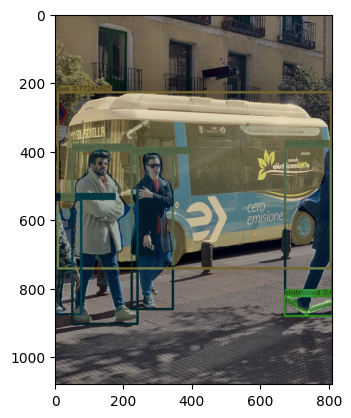

In [6]:
names = model.names 
colors = [tuple([random.randint(0, 255) for _ in range(3)]) for _ in range(len(names))] 
roi = np.zeros(img.shape).astype(np.int32)
for box, mask in zip(r[0].boxes, r[0].masks):
    # Bounding box & Category
    bbox = box.xyxy.cpu().numpy()[0].astype(np.int32)
    category = int(box.cls.cpu().numpy()[0])
    img = cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (colors[category]), 5)    
    label = names[category] +' '+str(box.conf.cpu().numpy()[0])    
    (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)
    # Prints the text.    
    img = cv2.rectangle(img, (bbox[0], bbox[1] - 20), (bbox[0] + w, bbox[1]), colors[category], -1)
    img = cv2.putText(img, label, (bbox[0], bbox[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 1)   
    # Mask
    m = mask.data.cpu().numpy()
    resized = cv2.resize(m, (img.shape[1], img.shape[0]), interpolation = cv2.INTER_AREA)
    contours, _ = cv2.findContours(np.array(resized, np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = []
    area = 0
    for c in contours:
        a = cv2.contourArea(c)
        if a > area:
            cnt = c
            area = a
    roi = cv2.drawContours(roi, [cnt], -1, colors[category], -1)   
blended = ((0.6 * img) + (0.4 * roi)).astype("uint8")
plt.imshow(blended)
plt.show()